# Figures
### Author: Divya Veerapaneni MS4, Ong Lab
### Description: This ipynb notebook generates bar plot figures of abnormal pupil phenotypes.
### Input: Consolidated_Study_Cohort_Traits.xlsx - patient data





## Preprocessing

In [1]:
#import statements
import pandas as pd
import numpy as np
import csv
from datetime import datetime 
import datetime
import warnings
warnings.filterwarnings("ignore")
import HelperMethods
import statistics
import matplotlib.pylab as pylab
from scipy import stats
import statsmodels.stats.weightstats as sms

In [2]:
#read input files as dataframes
file_path = '/Users/divs/Box/1-BMC Smartguards/10-Processing and Visualization/8-TBI Pupillometry/Data/Intermediate Datasets/'
ground_truth = pd.read_excel('/Users/divs/Box/1-BMC Smartguards/10-Processing and Visualization/8-TBI Pupillometry/Data/Consolidated_Study_Cohort_Traits.xlsx')

In [3]:
#create datasets

#dataset for patients with at least one pupil abnormality
abn_pts = ground_truth[ground_truth.any_incidence == 1]

incidence_cols = ['any_incidence', 'poor_npi_incidence', 'npi_diff_incidence',
       'size_diff_incidence', 'uni_any_incidence',
       'stage1u_incidence', 'stage2u_incidence', 'stage3u_incidence',
        'bi_incidence', 'stage1b_incidence',
       'stage2b_incidence', 'stage3b_incidence']

#dataset for incidences of pupil abnormalities
incidences = ground_truth[['tbi_severity', 'any_incidence', 'poor_npi_incidence', 'npi_diff_incidence',
       'size_diff_incidence', 'uni_any_incidence',
       'stage1u_incidence', 'stage2u_incidence', 'stage3u_incidence',
        'bi_incidence', 'stage1b_incidence',
       'stage2b_incidence', 'stage3b_incidence']]

burden_cols = ['any_burden',
       'poor_npi_burden', 'npi_diff_burden', 'size_diff_burden',
       'uni_any_burden',  'stage1u_burden',
       'stage2u_burden', 'stage3u_burden', 'bi_burden',
       'stage1b_burden', 'stage2b_burden', 'stage3b_burden']

#dataset for burden of pupil abnormalities
burdens = ground_truth[['tbi_severity', 'any_burden',
       'poor_npi_burden', 'npi_diff_burden', 'size_diff_burden',
       'uni_any_burden',  'stage1u_burden',
       'stage2u_burden', 'stage3u_burden', 'bi_burden',
       'stage1b_burden', 'stage2b_burden', 'stage3b_burden']]

#organize datasets by tbi severity
incidence_by_severity =incidences.groupby('tbi_severity') 
burden_by_severity = burdens.groupby('tbi_severity')

In [4]:
#helper method to compute incidence ratio for each tbi severity group
def create_incidence(incidence_grouping, pupil_cols):
  incidence = incidence_grouping.size().to_frame(name='obs')
  for col in pupil_cols:
    incidence[col.replace('_incidence','')] = incidence_grouping[col].sum()/incidence_grouping.size()*100
  return incidence

#helper method to compute median for each pupil abnormality distribution for each tbi severity group
def create_median_burden(burden_grouping, pupil_cols):
  median = burden_grouping.size().to_frame(name='obs')
  for col in pupil_cols:
    median[col.replace('_burden','')] = burden_grouping[col].median()
  return median

#helper method to compute mean for each pupil abnormality distribution for each tbi severity group
def create_mean_burden(burden_grouping, pupil_cols):
  mean = burden_grouping.size().to_frame(name='obs')
  for col in pupil_cols:
    mean[col.replace('_burden','')] = burden_grouping[col].mean()
  return mean

#helper method to compute confidence interval and errors for error bars
def compute_error(input_groupbydf, cols):
  conf = input_groupbydf[cols].apply(lambda x: sms.DescrStatsW(x).tconfint_mean(alpha=0.05))
  error = pd.DataFrame()
  error['mild'] = (conf["Mild"][1]- conf["Mild"][0])/2
  error['moderate'] = (conf["Moderate"][1]- conf["Moderate"][0])/2
  error['severe'] = (conf["Severe"][1]- conf["Severe"][0])/2
  return error

#computed datasets for incidence, mean burden, and median burden for each pupil abnormality by tbi severity
incidence_df = create_incidence(incidence_by_severity, incidence_cols)
mean_df = create_mean_burden(burden_by_severity, burden_cols)
median_df = create_median_burden(burden_by_severity, burden_cols)
median_df

,obs,any,poor_npi,npi_diff,size_diff,uni_any,stage1u,stage2u,stage3u,bi,stage1b,stage2b,stage3b
tbi_severity,,,,,,,,,,,,,
Mild,49,4.545455,0.000000,0.000000,0.000000,4.545455,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moderate,20,12.372449,0.000000,2.699309,1.020408,11.352041,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Severe,67,16.666667,3.896104,5.882353,5.194805,13.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Figure 1A Incidence Bar Graph

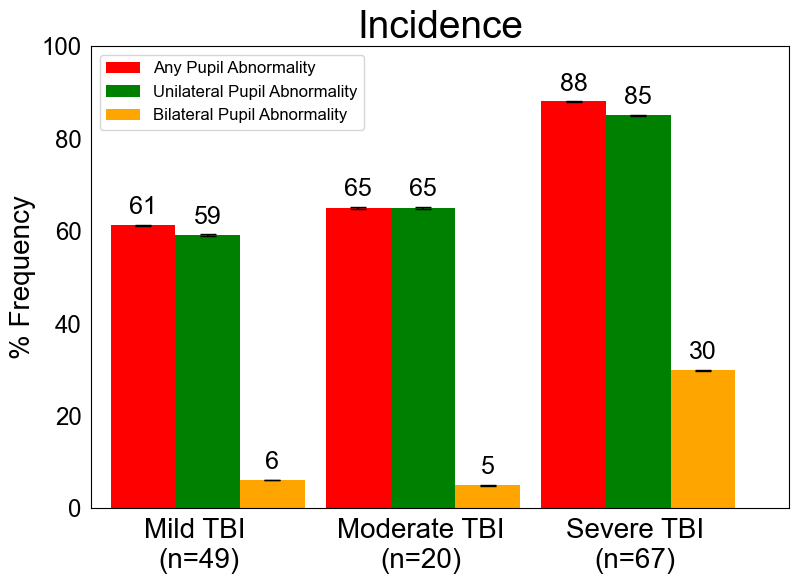

In [5]:
#bar graph with error bars for any, uni, and bilateral incidence of abnormal pupil phenotypes in full cohort

#formatting
plot_df = incidence_df[['any', 'uni_any', 'bi']]
pos_index = [-x-0.3 for x in range(3)]
bar_widths = 0.3
params = {'legend.fontsize': 'large',
          'figure.figsize': (9, 6),
         'axes.labelsize': '20',
         'axes.titlesize':'28',
         'xtick.labelsize':'20',
         'ytick.labelsize':'xx-large',
         'font.family': 'Arial'}
pylab.rcParams.update(params)

#error bars
col_list = ['any_incidence', 'uni_any_incidence', 'bi_incidence']
error = compute_error(incidence_by_severity, col_list)
any_error = error.iloc[0].to_list()
uni_error = error.iloc[1].to_list()
bi_error = error.iloc[2].to_list()

#bar plots
ax = plot_df[['any']].plot.bar(position = pos_index[0], width=bar_widths, color=['red'], 
    title='Incidence', figsize=(9,6), ylim=[0,100], ylabel='% Frequency', yerr = any_error, capsize=6)
plot_df[['uni_any']].plot.bar(position = pos_index[1], ax=ax, width=bar_widths, color=['green'], yerr = uni_error, capsize=6)
plot_df[['bi']].plot.bar(position = pos_index[2], ax=ax, width=bar_widths, color=['orange'], yerr=bi_error, capsize=6)

#annotate
for container in ax.containers[1::2]:
    ax.bar_label(container, label_type='edge', fmt='%1.0f', fontsize =18, padding = 4)
ax.legend(labels=['Any Pupil Abnormality', 'Unilateral Pupil Abnormality', 'Bilateral Pupil Abnormality'])

#basic layout
ax.set_xticks(ticks = [0.5,1.53,2.525], labels = ['Mild TBI \n(n='+str(median_df.obs.Mild) +')', 
                                                  'Moderate TBI\n(n='+str(median_df.obs.Moderate) +')', 
                                                  'Severe TBI\n(n='+str(median_df.obs.Severe) +')'], rotation=0)
ax.set(xlabel=None)
#ax.legend().set_visible(False)
ax.tick_params(left= False, bottom = False)

## Figure 1B Median Bar Graph

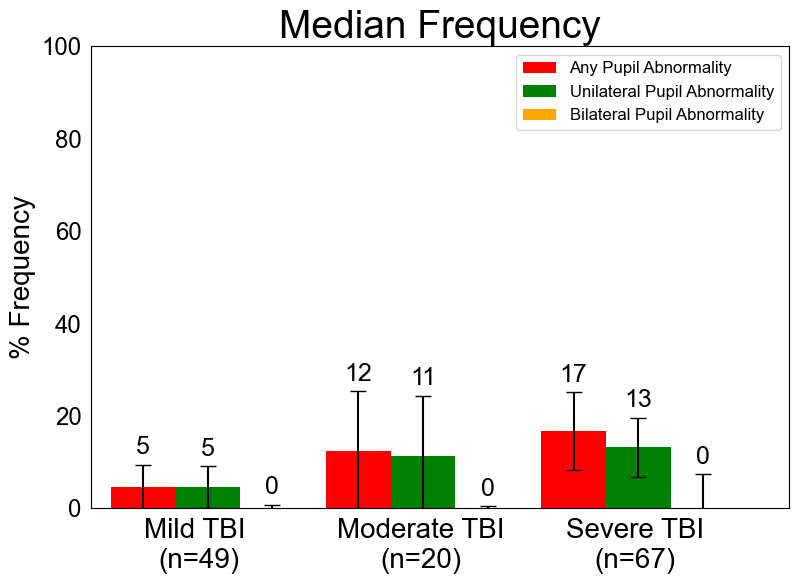

In [6]:
#bar graph with error bars for any, uni, and bilateral burden of abnormal pupil phenotypes in full cohort

#formatting
plot_df = median_df[['any', 'uni_any', 'bi']]
pos_index = [-x-0.3 for x in range(3)]
bar_widths = 0.3
params = {'legend.fontsize': 'large',
          'figure.figsize': (9, 6),
         'axes.labelsize': '20',
         'axes.titlesize':'28',
         'xtick.labelsize':'20',
         'ytick.labelsize':'xx-large',
         'font.family': 'Arial'}
pylab.rcParams.update(params)

#error bars
col_list = ['any_burden', 'uni_any_burden', 'bi_burden']
error = compute_error(burden_by_severity, col_list)
any_error = error.iloc[0].to_list()
uni_error = error.iloc[1].to_list()
bi_error = error.iloc[2].to_list()

#bar plots
ax = plot_df[['any']].plot.bar(position = pos_index[0], width=bar_widths, color=['red'], 
    title='Median Frequency', figsize=(9,6), ylim=[0,100], ylabel='% Frequency', yerr = any_error, capsize=6)
plot_df[['uni_any']].plot.bar(position = pos_index[1], ax=ax, width=bar_widths, color=['green'], yerr = uni_error, capsize=6)
plot_df[['bi']].plot.bar(position = pos_index[2], ax=ax, width=bar_widths, color=['orange'], yerr=bi_error, capsize=6)

#annotate
for container in ax.containers[1::2]:
    ax.bar_label(container, label_type='edge', fmt='%1.0f', fontsize =18, padding = 4)
ax.legend(labels=['Any Pupil Abnormality', 'Unilateral Pupil Abnormality', 'Bilateral Pupil Abnormality'])

#basic layout
ax.set_xticks(ticks = [0.5,1.53,2.525], labels = ['Mild TBI \n(n='+str(median_df.obs.Mild) +')', 
                                                  'Moderate TBI\n(n='+str(median_df.obs.Moderate) +')', 
                                                  'Severe TBI\n(n='+str(median_df.obs.Severe) +')'], rotation=0)
ax.set(xlabel=None)
#ax.legend().set_visible(True)
ax.tick_params(left= False, bottom = False)

## Supplementary Figure 2 Bar Graphs

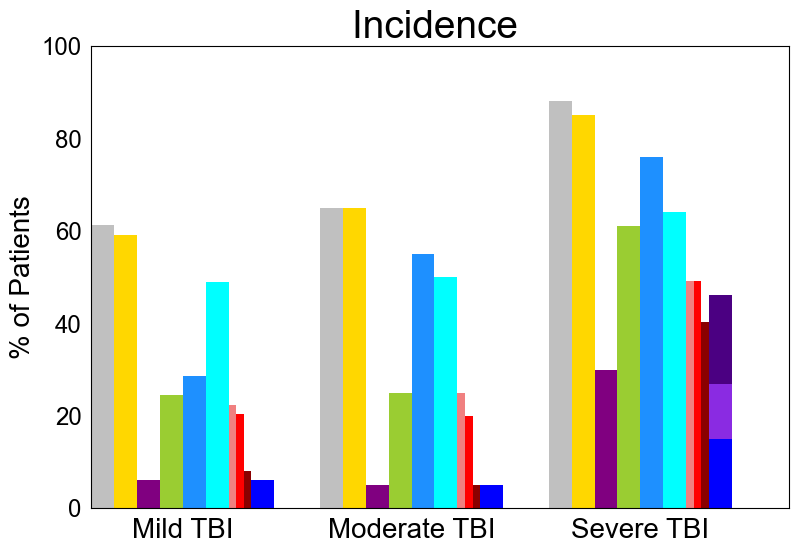

In [7]:
#INCIDENCE GRAPH

#formatting
pos_index = [-x for x in range(8)]
bar_widths = 0.1
params = {'legend.fontsize': 'large',
          'figure.figsize': (9, 6),
         'axes.labelsize': '20',
         'axes.titlesize':'28',
         'xtick.labelsize':'20',
         'ytick.labelsize':'xx-large',
         'font.family': 'Arial'}
pylab.rcParams.update(params)

#error bars
error = compute_error(incidence_by_severity, incidence_cols)
errors = []
for i in range(len(incidence_cols)):
    errors.append(error.iloc[i].to_list())

#bar plots
ax = incidence_df[['any']].plot.bar(position = pos_index[0], width=bar_widths, color=['silver'], title='Incidence ', ylim=[0,100], ylabel='% of Patients')#, capsize=6, yerr = errors[0])
incidence_df[['uni_any']].plot.bar(position = pos_index[1], ax=ax, width=bar_widths, color=['gold'])#, capsize=6, yerr = errors[4])
incidence_df[['bi']].plot.bar(position = pos_index[2], ax=ax, width=bar_widths, color=['purple'])#, capsize=6, yerr = errors[8])
#isolated pupil abns
incidence_df[['poor_npi']].plot.bar(position = pos_index[3], ax=ax, width=bar_widths, color=['yellowgreen'])#, capsize=6, yerr = errors[1])
incidence_df[['npi_diff']].plot.bar(position = pos_index[4], ax=ax, width=bar_widths, color=['dodgerblue'])#, capsize=6, yerr = errors[2])
incidence_df[['size_diff']].plot.bar(position = pos_index[5], ax=ax, width=bar_widths, color=['cyan'])#, capsize=6, yerr = errors[3])
#uni stages
incidence_df[['stage1u', 'stage2u', 'stage3u']].plot.bar(stacked=False, position = pos_index[6], ax=ax, width=bar_widths, color=[ 'lightcoral', 'red', 'darkred'])#, capsize=6, yerr = errors[5:8])
#bl stages
incidence_df[['stage1b', 'stage2b', 'stage3b']].plot.bar(stacked=True, position = pos_index[7], ax=ax, width=bar_widths, color=['blue', 'blueviolet', 'indigo'], rot=0)#, capsize=6, yerr = errors[9:12])

#annotate
# for container in ax.containers[1::2]:
#     ax.bar_label(container, label_type='edge', fmt='%1.0f', fontsize =10, padding = 4)

#basic layout
ax.set_xticks(ticks = [0.4,1.4,2.4], labels = ['Mild TBI', 'Moderate TBI', 'Severe TBI'])
ax.set(xlabel=None)
ax.legend().set_visible(False)
ax.tick_params(left= False, bottom = False)
# plt.savefig('/Users/divs/Box/1-BMC Smartguards/10-Processing and Visualization/8-TBI Pupillometry/Manuscripts/3-Figures/Incidence_n102.png', dpi = 400)

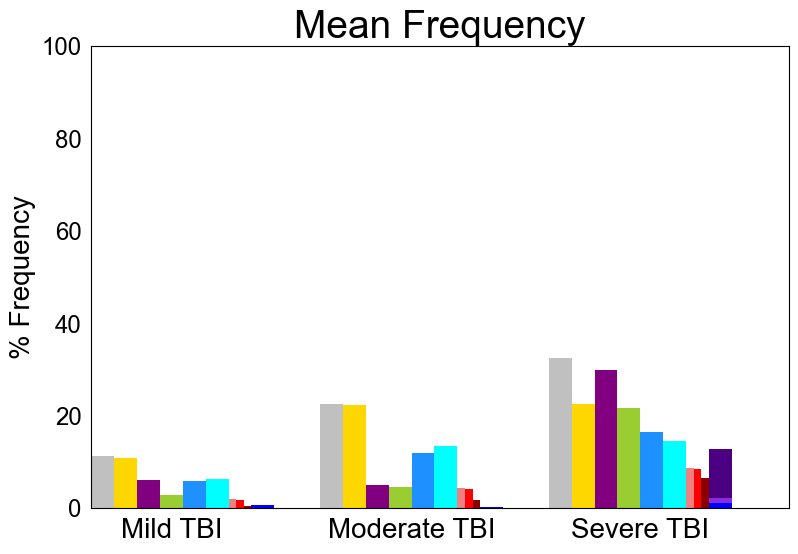

In [8]:
#MEAN BURDEN GRAPH

#formatting
pos_index = [-x for x in range(8)]
bar_widths = 0.1
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (9, 6),
         'axes.labelsize': '20',
         'axes.titlesize':'28',
         'xtick.labelsize':'20',
         'ytick.labelsize':'xx-large',
         'font.family': 'Arial'}
pylab.rcParams.update(params)

#bar plots
ax = mean_df[['any']].plot.bar(position = pos_index[0], width=bar_widths, color=['silver'], 
    title='Mean Frequency', figsize=(9,6), ylim=[0,100], ylabel = "% Frequency")
mean_df[['uni_any']].plot.bar(position = pos_index[1], ax=ax, width=bar_widths, color=['gold'])
incidence_df[['bi']].plot.bar(position = pos_index[2], ax=ax, width=bar_widths, color=['purple'])
#isolated pupil abns
mean_df[['poor_npi']].plot.bar(position = pos_index[3], ax=ax, width=bar_widths, color=['yellowgreen'])
mean_df[['npi_diff']].plot.bar(position = pos_index[4], ax=ax, width=bar_widths, color=['dodgerblue'])
mean_df[['size_diff']].plot.bar(position = pos_index[5], ax=ax, width=bar_widths, color=['cyan'])                            
#uni stages
mean_df[['stage1u', 'stage2u', 'stage3u']].plot.bar(stacked=False, position = pos_index[6], ax=ax, width=bar_widths, color=[ 'lightcoral', 'red', 'darkred'])
#bl stages
mean_df[['stage1b', 'stage2b', 'stage3b']].plot.bar(stacked=True, position = pos_index[7], ax=ax, width=bar_widths, color=['blue', 'blueviolet', 'indigo'], rot=0)

#basic layout
ax.set_xticks(ticks = [0.35,1.4,2.4], labels = ['Mild TBI', 'Moderate TBI', 'Severe TBI'])
ax.set(xlabel=None)
ax.legend().set_visible(False)
ax.tick_params(left= False, bottom = False)

# plt.savefig('/Users/divs/Box/1-BMC Smartguards/10-Processing and Visualization/8-TBI Pupillometry/Manuscripts/3-Figures/Mean_Freq_n102.png', dpi = 400)
#ax.legend(['Uni NPi<3', 'Uni NPi<3, NPi Diff>=0.7', 'Uni NPi<3, NPi Diff>=0.7, & Size Diff>=1', 'B/l NPi<3 (not 0)', 'B/l NPi<3 (with 0)', 'B/l NPi 0'])

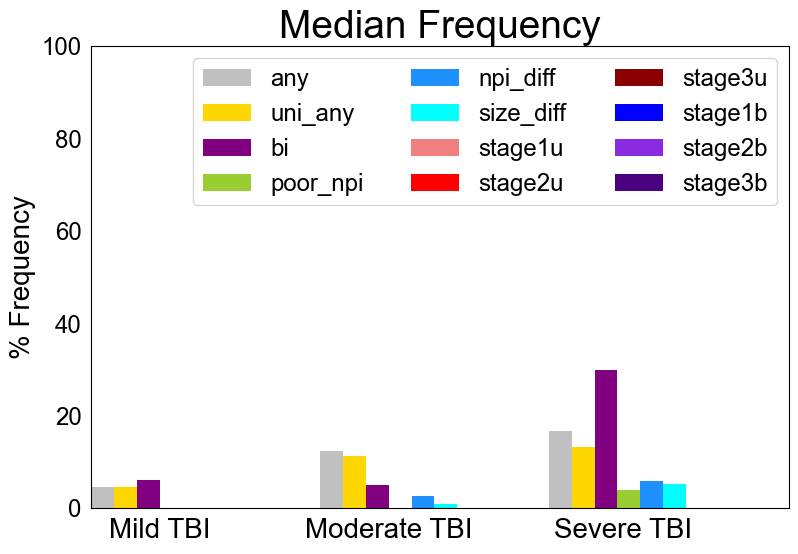

In [9]:
#MEDIAN BURDEN GRAPH

#formatting
pos_index = [-x for x in range(8)]
bar_widths = 0.1
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (9, 6),
         'axes.labelsize': '20',
         'axes.titlesize':'28',
         'xtick.labelsize':'20',
         'ytick.labelsize':'xx-large',
         'font.family': 'Arial'}
pylab.rcParams.update(params)

#error bars
error = compute_error(burden_by_severity, burden_cols)
errors = []
for i in range(len(burden_cols)):
    errors.append(error.iloc[i].to_list())

#bar plots
ax = median_df[['any']].plot.bar(position = pos_index[0], width=bar_widths, color=['silver'], 
    title='Median Frequency', figsize=(9,6), ylim=[0,100], ylabel= '% Frequency')#, yerr=errors[0], capsize=4)
median_df[['uni_any']].plot.bar(position = pos_index[1], ax=ax, width=bar_widths, color=['gold'])#, yerr=errors[4], capsize=4)
incidence_df[['bi']].plot.bar(position = pos_index[2], ax=ax, width=bar_widths, color=['purple'])#, yerr=errors[8], capsize=4)

#isolated pupil abns
median_df[['poor_npi']].plot.bar(position = pos_index[3], ax=ax, width=bar_widths, color=['yellowgreen'])#, yerr=errors[1], capsize=4)
median_df[['npi_diff']].plot.bar(position = pos_index[4], ax=ax, width=bar_widths, color=['dodgerblue'])#, yerr=errors[2], capsize=4)
median_df[['size_diff']].plot.bar(position = pos_index[5], ax=ax, width=bar_widths, color=['cyan'])#, yerr=errors[3], capsize=4)
                               
#uni stages
median_df[['stage1u', 'stage2u', 'stage3u']].plot.bar(stacked=False, position = pos_index[6], ax=ax, width=bar_widths, color=[ 'lightcoral', 'red', 'darkred'])#, yerr=errors[5:8], capsize=4)
#bl stages
median_df[['stage1b', 'stage2b', 'stage3b']].plot.bar(stacked=True, position = pos_index[7], ax=ax, width=bar_widths, color=['blue', 'blueviolet', 'indigo'], rot=0, )#yerr=errors[9:], capsize=4)

#annotate
# for container in ax.containers[1::2]:
#     ax.bar_label(container, label_type='edge', fmt='%1.0f', fontsize =10, padding = 4)

#basic layout
ax.set_xticks(ticks = [0.3,1.3,2.325], labels = ['Mild TBI', 'Moderate TBI', 'Severe TBI'])
ax.set(xlabel=None)
ax.legend(ncol=3)
ax.tick_params(left= False, bottom = False)

# plt.savefig('/Users/divs/Box/1-BMC Smartguards/10-Processing and Visualization/8-TBI Pupillometry/Manuscripts/3-Figures/Median_Freq_n102.png', dpi = 400)